In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../../train_test_files/train.csv')

In [2]:
data

,response_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,promotions_count,...,dependents_count,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,exit_status
0,8410,31,Male,19,Education,5390.0,Excellent,Medium,Average,2,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.0,Poor,High,Low,3,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.0,Good,High,Low,0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989.0,Good,High,High,1,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.0,NaN,NaN,Average,0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59606,7984,47,Female,2,Finance,NaN,NaN,NaN,Average,0,...,NaN,Entry,NaN,NaN,No,No,No,Good,Very High,Left
59607,23782,55,Female,26,Finance,NaN,NaN,NaN,Average,0,...,NaN,Mid,NaN,NaN,No,No,Yes,Excellent,Medium,Left
59608,6829,20,Male,6,Education,NaN,NaN,NaN,Below Average,0,...,NaN,Entry,NaN,NaN,No,Yes,No,Poor,Low,Stayed
59609,1973,28,Male,6,Media,NaN,NaN,NaN,Average,1,...,NaN,Entry,NaN,NaN,No,No,No,Good,High,Left


In [3]:
data.isna().sum()

response_id                     0
age                             0
gender                          0
years_at_company                0
job_role                        0
monthly_income               1800
work_life_balance           10144
job_satisfaction             7164
performance_rating              0
promotions_count                0
overtime                        0
distance_from_home              0
education_level                 0
marital_status                  0
dependents_count             4780
job_level                       0
company_size                 2992
company_tenure               4184
remote_work                     0
leadership_opportunities        0
innovation_opportunities        0
company_reputation              0
employee_recognition            0
exit_status                     0
dtype: int64

In [4]:
for col in data.columns:
  print(col, len(data[col].unique()))

response_id 59598
age 46
gender 2
years_at_company 51
job_role 5
monthly_income 9546
work_life_balance 5
job_satisfaction 5
performance_rating 4
promotions_count 5
overtime 2
distance_from_home 105
education_level 5
marital_status 3
dependents_count 8
job_level 3
company_size 4
company_tenure 127
remote_work 2
leadership_opportunities 2
innovation_opportunities 2
company_reputation 4
employee_recognition 4
exit_status 2


In [5]:
data['monthly_income'].describe()

count    57811.000000
mean      7311.070350
std       2197.444033
min       1316.000000
25%       5661.000000
50%       7358.000000
75%       8882.000000
max      56050.000000
Name: monthly_income, dtype: float64

/tmp/ipykernel_76356/2100824096.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['monthly_income'], shade=True)


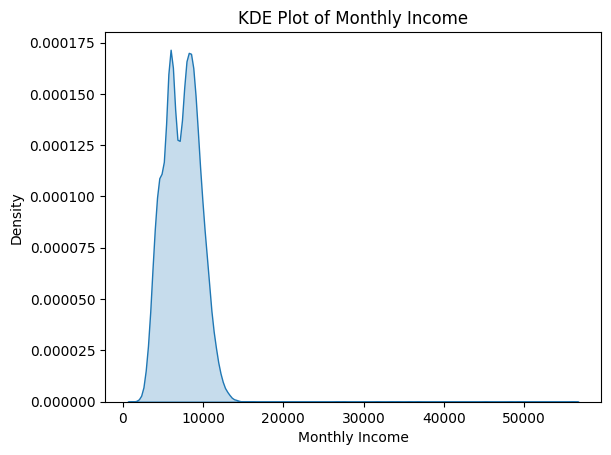

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data['monthly_income'], shade=True)
plt.title("KDE Plot of Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.show()

In [7]:
data['monthly_income'] = data['monthly_income'].fillna(data['monthly_income'].mean())

In [8]:
data['dependents_count'] = data['dependents_count'].fillna(data['dependents_count'].median())
data['company_size'] = data['company_size'].fillna(data['company_size'].mode()[0])
data['company_tenure'] = data['company_tenure'].fillna(data['company_tenure'].median())

In [9]:
unique_value_counts_dict = data['job_satisfaction'].value_counts().to_dict()
print("Unique value counts as dictionary:", unique_value_counts_dict)

Unique value counts as dictionary: {'High': 26255, 'Very High': 10609, 'Medium': 10416, 'Low': 5167}


In [10]:
# data = data.dropna(subset=['monthly_income','dependents_count','company_size','company_tenure'])
# data.isna().sum()

In [11]:
data

,response_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,promotions_count,...,dependents_count,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,exit_status
0,8410,31,Male,19,Education,5390.00000,Excellent,Medium,Average,2,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.00000,Poor,High,Low,3,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.00000,Good,High,Low,0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989.00000,Good,High,High,1,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.00000,NaN,NaN,Average,0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59606,7984,47,Female,2,Finance,7311.07035,NaN,NaN,Average,0,...,1.0,Entry,Medium,56.0,No,No,No,Good,Very High,Left
59607,23782,55,Female,26,Finance,7311.07035,NaN,NaN,Average,0,...,1.0,Mid,Medium,56.0,No,No,Yes,Excellent,Medium,Left
59608,6829,20,Male,6,Education,7311.07035,NaN,NaN,Below Average,0,...,1.0,Entry,Medium,56.0,No,Yes,No,Poor,Low,Stayed
59609,1973,28,Male,6,Media,7311.07035,NaN,NaN,Average,1,...,1.0,Entry,Medium,56.0,No,No,No,Good,High,Left


In [12]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

imputer = KNNImputer(n_neighbors=5)

data[categorical_columns] = imputer.fit_transform(data[categorical_columns])


for col in categorical_columns:
    le = label_encoders[col]
    data[col] = le.inverse_transform(data[col].astype(int))


In [13]:
data

,response_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,promotions_count,...,dependents_count,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,exit_status
0,8410,31,Male,19,Education,5390.00000,Excellent,Medium,Average,2,...,0.0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534.00000,Poor,High,Low,3,...,3.0,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159.00000,Good,High,Low,0,...,3.0,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989.00000,Good,High,High,1,...,2.0,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821.00000,nan,nan,Average,0,...,0.0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59606,7984,47,Female,2,Finance,7311.07035,nan,nan,Average,0,...,1.0,Entry,Medium,56.0,No,No,No,Good,Very High,Left
59607,23782,55,Female,26,Finance,7311.07035,nan,nan,Average,0,...,1.0,Mid,Medium,56.0,No,No,Yes,Excellent,Medium,Left
59608,6829,20,Male,6,Education,7311.07035,nan,nan,Below Average,0,...,1.0,Entry,Medium,56.0,No,Yes,No,Poor,Low,Stayed
59609,1973,28,Male,6,Media,7311.07035,nan,nan,Average,1,...,1.0,Entry,Medium,56.0,No,No,No,Good,High,Left


In [14]:
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

data.head(10)

,response_id,age,gender,years_at_company,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,promotions_count,...,dependents_count,job_level,company_size,company_tenure,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,exit_status
0,8410,31,1,19,0,5390.0,0,2,0,2,...,0.0,1,1,89.0,0,0,0,0,2,1
1,64756,59,0,4,3,5534.0,3,0,3,3,...,3.0,1,1,21.0,0,0,0,1,1,1
2,30257,24,0,10,2,8159.0,2,0,3,0,...,3.0,1,1,74.0,0,0,0,3,1,1
3,65791,36,0,7,0,3989.0,2,0,2,1,...,2.0,1,2,50.0,1,0,0,2,2,1
4,65026,56,1,41,0,4821.0,4,4,0,0,...,0.0,2,1,68.0,0,0,0,1,2,1
5,24368,38,0,3,4,9977.0,1,0,1,3,...,0.0,1,1,47.0,0,0,1,1,0,0
6,64970,47,1,23,0,3681.0,4,4,2,1,...,1.0,0,2,93.0,0,0,0,2,2,0
7,36999,48,1,16,1,11223.0,0,3,2,2,...,4.0,0,1,88.0,0,0,0,0,1,1
8,32714,57,1,44,0,3773.0,2,2,2,1,...,4.0,0,1,75.0,0,0,0,1,2,1
9,15944,24,0,1,2,7319.0,3,0,0,1,...,4.0,0,0,45.0,0,0,1,2,1,0


In [15]:
data.to_csv('preprocessed_data.csv', index=False)

In [16]:
data.isna().sum()

response_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
promotions_count            0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
dependents_count            0
job_level                   0
company_size                0
company_tenure              0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
exit_status                 0
dtype: int64